# Machine Learning Exercise

## 回归问题（Regression）

### 线性回归（Linear Regression）



In [5]:
# 参考答案
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import math

# 读取数据
data = pd.read_csv("data/linear-regression-dataset.csv")
# 查看数据基本信息
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
x    14 non-null float64
y    14 non-null int64
dtypes: float64(1), int64(1)
memory usage: 304.0 bytes
None
     x     y
0  0.5  2500
1  0.0  2250
2  1.0  2750
3  5.0  8000
4  8.0  9000
               x             y
count  14.000000     14.000000
mean    6.250000   8778.571429
std     4.979767   5733.495185
min     0.000000   2250.000000
25%     2.250000   4125.000000
50%     5.500000   7750.000000
75%     9.500000  12000.000000
max    15.000000  20000.000000


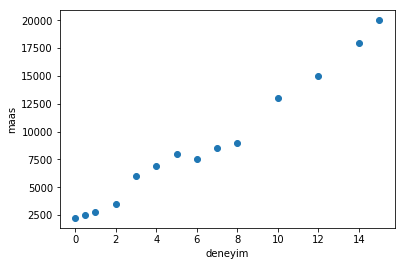

In [6]:
# 使用散点图查看数据分布
plt.scatter(data['x'],data['y'])
# 设置轴标签
plt.xlabel("deneyim")
plt.ylabel("maas");

In [9]:
# 线性回归建模

# 从sklearn库中导入线性回归函数
from sklearn.linear_model import LinearRegression
# 实例化线性回归
linear_reg = LinearRegression()
# 定义自变量与因变量
x = data[['x']]
y = data['y']
# 训练模型
linear_reg.fit(x,y)

# 查看模型R^2评分
print('R-Score: ', linear_reg.score(x, y))

R-Score:  0.9775283164949903


In [12]:
# 查看模型参数
print("x的系数为: ", linear_reg.coef_)
print("截距为: ", linear_reg.intercept_)
print("回归方程为: y = " + str(linear_reg.intercept_) + " + (x * " + str(linear_reg.coef_[0]) + ")")

x的系数为:  [1138.34819698]
截距为:  1663.895197474103
回归方程为: y = 1663.895197474103 + (x * 1138.3481969755721)


In [17]:
x.max()

x    15.0
dtype: float64

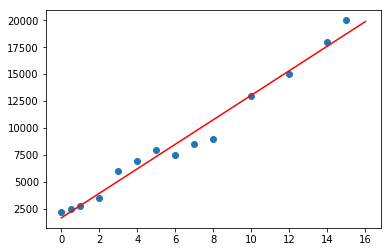

In [19]:
# 查看预测结果
import numpy as np
# 定义预测用x
array = np.arange(int(x.max())+2).reshape(-1,1)  

# 绘制x与y的散点图
plt.scatter(x,y)

# 模型预测
y_head = linear_reg.predict(array) 
# 绘制预测线，标记为红色
plt.plot(array, y_head,color = "red");


### 多重线性回归（Multiple Linear Regression）

In [25]:
# 导入库
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 读入数据
data = pd.read_csv("data/multiple-linear-regression-dataset.csv")
# 查看数据概览
print(data.info())
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
x_1    14 non-null float64
y      14 non-null int64
x_2    14 non-null int64
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes
None
   x_1     y  x_2
0  0.5  2500   22
1  0.0  2250   21
2  1.0  2750   23
3  5.0  8000   25
4  8.0  9000   28
             x_1             y        x_2
count  14.000000     14.000000  14.000000
mean    6.250000   8778.571429  26.714286
std     4.979767   5733.495185   4.713786
min     0.000000   2250.000000  21.000000
25%     2.250000   4125.000000  23.000000
50%     5.500000   7750.000000  26.000000
75%     9.500000  12000.000000  29.750000
max    15.000000  20000.000000  35.000000


In [26]:
# 定义自变量与因变量
x = data.iloc[:,[0,2]]
y = data['y'].values

# 实例化线性回归模型
multiple_linear_regression = LinearRegression()
# 拟合
multiple_linear_regression.fit(x,y)

# 查看模型参数
print("截距: ",multiple_linear_regression.intercept_)
print("系数: ", multiple_linear_regression.coef_)

截距:  10376.627472275015
系数:  [1525.50072054 -416.72218625]


In [28]:
# 预测
x_ = np.array([[10,35],[5,35]])
y_pred = multiple_linear_regression.predict(x) 

In [29]:
# 查看R方评分
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_pred))

r_square score:  0.9818393838730448


### 多项式线性回归（Polynomial Linear Regression）

In [36]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif']=['simhei']

# 读取数据
data = pd.read_csv("data/polynomial-regression.csv")
# 查看数据概览
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
总量    15 non-null int64
增速    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes
None
    总量   增速
0   60  180
1   70  180
2   80  200
3  100  200
4  120  200


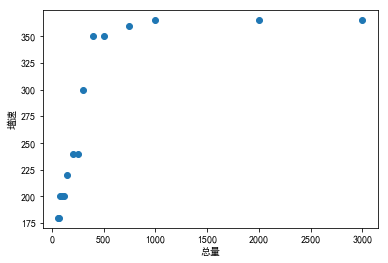

In [37]:
# 定义自变量与因变量
x = data[['总量']]
y = data['增速']

# 绘制总量与增速的散点图
plt.scatter(x,y)
# 添加x/y轴标签
plt.xlabel("总量")
plt.ylabel("增速");

In [43]:
# 导入多项式及线性回归模型
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 分别拟合线性回归，2阶、4阶多项式回归模型
lr_model = LinearRegression()
lr_model.fit(x,y)

# 拟合2阶多项式回归
polynominal_regression = PolynomialFeatures(degree=2)
x_polynomial_2 = polynominal_regression.fit_transform(x,y)
linear_regression_2 = LinearRegression()
linear_regression_2.fit(x_polynomial_2,y)

# 拟合4阶多项式回归
polynominal_regression = PolynomialFeatures(degree=4)
x_polynomial_4 = polynominal_regression.fit_transform(x,y)
linear_regression_4 = LinearRegression()
linear_regression_4.fit(x_polynomial_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

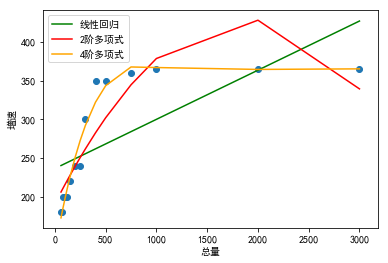

In [45]:
# 分别预测
y_pred_lr = lr_model.predict(x)
y_pred_lr_2 = linear_regression_2.predict(x_polynomial_2)
y_pred_lr_4 = linear_regression_4.predict(x_polynomial_4)

# 绘制结果
plt.plot(x,y_pred_lr,color= "green",label = "线性回归")
plt.plot(x,y_pred_lr_2,color= "red",label = "2阶多项式")
plt.plot(x,y_pred_lr_4,color= "orange",label = "4阶多项式")
# 显示图例
plt.legend()
# 绘制x与y的散点图
plt.scatter(x,y)
# 添加x、y轴标签
plt.xlabel("总量")
plt.ylabel("增速");

In [46]:
# 查看各模型评分
from sklearn.metrics import r2_score
print("线性回归r_square score: ", r2_score(y,y_pred_lr))
print("2阶多项式r_square score: ", r2_score(y,y_pred_lr_2))
print("4阶多项式r_square score: ", r2_score(y,y_pred_lr_4))

线性回归r_square score:  0.4745823761330058
2阶多项式r_square score:  0.81088099873991
4阶多项式r_square score:  0.969474302321178


### 支持向量回归（Support Vector Regression）

In [53]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
# 设置显示负号
plt.rcParams['axes.unicode_minus']=False

# 导入数据
data = pd.read_csv("data/maaslar.csv")
# 查看数据概览
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
职业      10 non-null object
学历层次    10 non-null int64
薪资      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes
None
                 职业  学历层次    薪资
0             Cayci     1  2250
1          Sekreter     2  2500
2  Uzman Yardimcisi     3  3000
3             Uzman     4  4000
4  Proje Yoneticisi     5  5500


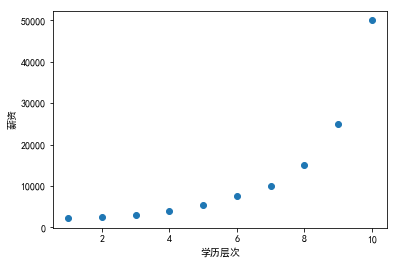

In [55]:
# 定义自变量与因变量
x = data.iloc[:,1:2]
y = data['薪资']
# 绘制x与y关系
plt.scatter(x,y)
# 添加x、y轴标签
plt.xlabel("学历层次")
plt.ylabel("薪资");

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


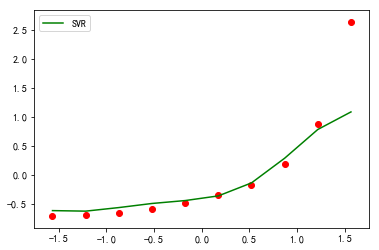

In [58]:
# 数值缩放
from sklearn.preprocessing import StandardScaler
# 实例化标准缩放
sc1 = StandardScaler()
# 拟合自变量
x_scale = sc1.fit_transform(x)
sc2 = StandardScaler()
y_scale = sc2.fit_transform(y.values.reshape(-1,1))

# 导入模型
from sklearn.svm import SVR
# 实例化模型，使用rbf核技巧
svr_reg = SVR(kernel = 'rbf')
# 拟合数据
svr_reg.fit(x_scale,y_scale)

# 预测
y_pred = svr_reg.predict(x_scale)

# 可视化结果
plt.plot(x_scale,y_pred,color= "green",label = "SVR")
plt.legend()
plt.scatter(x_scale,y_scale,color='red');

In [60]:
# 模型评分
print('R-Score: ', svr_reg.score(x_scale, y_scale))

R-Score:  0.7513836788854973



### 决策树回归（Decision Tree Regression）

In [63]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 导入数据
data = pd.read_csv("data/decision-tree-regression-dataset.csv", header=None)
# 查看数据概览
print(data.info())
print(data.head())
#print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
0    10 non-null int64
1    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes
None
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50


In [64]:
# 设置自变量与因变量
x = data[[0]]
y = data[1]

In [65]:
# 导入模型
from sklearn.tree import DecisionTreeRegressor
# 实例化
tree_reg = DecisionTreeRegressor()
# 拟合
tree_reg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
np.arange(min(x),max(x),0.01)

array([], dtype=float64)

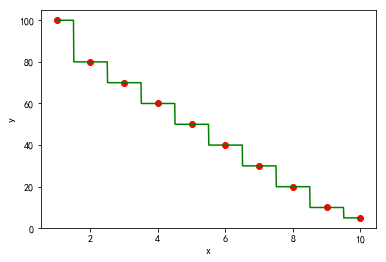

In [73]:
# 模型预测
x_test = np.arange(min(x.values),max(x.values),0.01).reshape(-1,1)
y_pred = tree_reg.predict(x_test)

# 可视化结果
plt.scatter(x,y,color="red")
plt.plot(x_test,y_pred,color = "green")
plt.xlabel("x")
plt.ylabel("y");

In [77]:
# 查看评分
y_pred = tree_reg.predict(x)
print("r_square score: ", r2_score(y,y_pred))

r_square score:  1.0


### 随机森林回归（Random Forest Regression）

In [78]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# 导入数据
data = pd.read_csv("data/random-forest-regression-dataset.csv", header=None)
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
0    10 non-null int64
1    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes
None
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50


In [79]:
# 设定自变量、因变量
x = data[[0]]
y = data[1]

In [80]:
# 导入模型
from sklearn.ensemble import RandomForestRegressor
# 实例化模型，并设置模型中树的数量为100，random_state
rf = RandomForestRegressor(n_estimators = 100, random_state= 42) 
# 拟合数据
rf.fit(x,y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

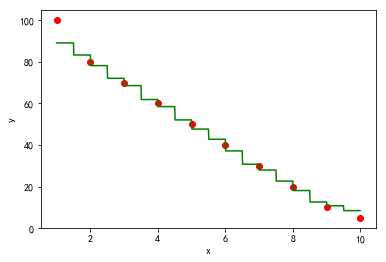

In [82]:
# 预测
x_test = np.arange(min(x.values),max(x.values),0.01).reshape(-1,1)
y_pred = rf.predict(x_test)
# 可视化结果
plt.scatter(x,y,color="red")
plt.plot(x_test,y_pred,color="green")
plt.xlabel("x")
plt.ylabel("y");

In [83]:
# 查看模型评分
y_pred = rf.predict(x)
from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_pred))

r_score:  0.9798724794092587


## 分类问题（ Classification）

### K近邻（K-Nearest Neighbour (KNN) Classification）

In [162]:
# 导入库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 导入数据
data = pd.read_csv("data/data.csv")
# 查看数据概览
print(data.info())
print(data.head())
#print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [163]:
# 删除无关列id与Unnamed: 32
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

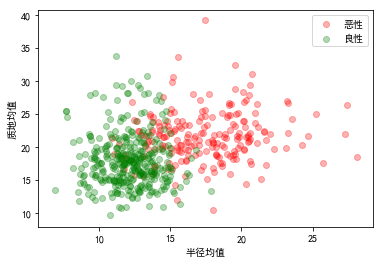

In [164]:
# 拆分良性与恶性肿瘤数据
M = data[data.diagnosis == "M"] # 恶性肿瘤
B = data[data.diagnosis == "B"] # 良性肿瘤
# 对数据进行可视化
# 分别绘制良性与恶性肿瘤数据，x轴设置为半径radius_mean，y轴设置为质地texture_mean，并添加图例，透明度设置为0.3
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="恶性",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="良性",alpha= 0.3)
# 添加轴标签
plt.xlabel("半径均值")
plt.ylabel("质地均值")
# 显示图例
plt.legend();

In [165]:
# 将恶性标记为1，良性标记为0
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# 定义特征与标签列
x_data = data.drop(["diagnosis"],axis=1)
y = data['diagnosis']

# 归一化特征
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [166]:
# 拆分训练集与测试集，设定训练集比例为30%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# 导入KNN模型
from sklearn.neighbors import KNeighborsClassifier
# 实例化模型，并设置近邻数量为3
knn = KNeighborsClassifier(n_neighbors = 3)
# 拟合数据
knn.fit(x_train,y_train)
# 预测
prediction = knn.predict(x_test)
# 查看模型评分（准确率）
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


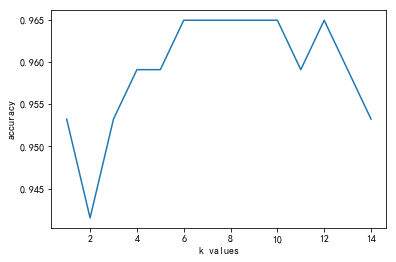

In [100]:
# 使用for循环，探索最佳近邻数
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
# 绘制结果
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy");

In [143]:
# 使用最佳近邻数量，重建模型
knn = KNeighborsClassifier(n_neighbors = 6)
# 拟合&预测
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("最佳近邻数为6，模型准确率为: {} ".format(knn.score(x_test,y_test)))

最佳近邻数为6，模型准确率为: 0.9186046511627907 


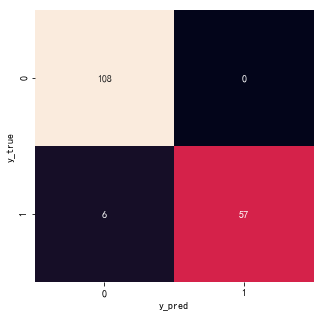

In [103]:
# 计算混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)

# 绘制混淆矩阵
# 导入seaborn可视化库
import seaborn as sns
# 定义画布
f, ax = plt.subplots(figsize =(5,5))
# 创建热度图，并显示数量（整数），隐藏色度指标
sns.heatmap(cm,annot = True,fmt = "d",cbar=False,ax=ax)
# 添加轴标签
plt.xlabel("y_pred")
plt.ylabel("y_true");

### 支持向量机（Support Vector Machine (SVM) Classification）

In [151]:
# 使用前面相同的数据

# 导入支持向量机模型
from sklearn.svm import SVC
# 拟合数据 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# 预测&评分
print("模型准确率为: ",svm.score(x_test,y_test))

模型准确率为:  0.9649122807017544


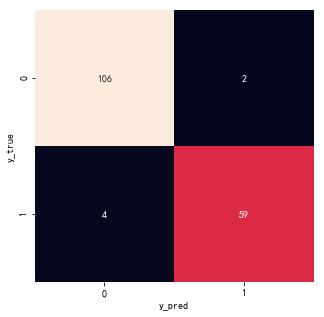

In [106]:
# 绘制混淆矩阵
# 预测结果
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# 绘制热度图
f, ax = plt.subplots(figsize =(5,5))
# 创建热度图，并显示数量（整数），隐藏色度指标
sns.heatmap(cm,annot = True,fmt = "d",cbar=False,ax=ax)
# 添加轴标签
plt.xlabel("y_pred")
plt.ylabel("y_true");

### 朴素贝叶斯（Naive Bayes Classification）

In [156]:
# 使用前面相同的数据

# 导入模型
from sklearn.naive_bayes import GaussianNB
# 实例化模型
nb = GaussianNB()
# 拟合数据
nb.fit(x_train,y_train)
# 查看评分
print("模型准确率为: ",nb.score(x_test,y_test))

模型准确率为:  0.935672514619883


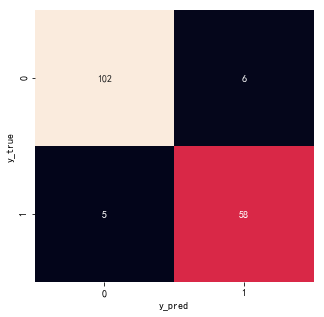

In [109]:
# 绘制混淆矩阵
# 预测结果
y_pred = nb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# 绘制热度图
f, ax = plt.subplots(figsize =(5,5))
# 创建热度图，并显示数量（整数），隐藏色度指标
sns.heatmap(cm,annot = True,fmt = "d",cbar=False,ax=ax)
# 添加轴标签
plt.xlabel("y_pred")
plt.ylabel("y_true");

In [161]:
# 重新定义x
x_no_scaled = x_data.values
# 切分数据
x_train_no_scaled, x_test_no_scaled, y_train_no_scaled, y_test_no_scaled = train_test_split(x_no_scaled, y, 
                                                                        test_size=0.15,
                                                                        random_state=42)
# 实例化模型
nb = GaussianNB()
# 拟合数据
nb.fit(x_train_no_scaled,y_train_no_scaled)
# 查看评分
print("模型准确率为: ",nb.score(x_test_no_scaled,y_test_no_scaled))

模型准确率为:  0.9534883720930233


### 决策树（Decision Tree Classification）

In [174]:
# 使用前面相同的数据
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier
# 实例化模型
dt = DecisionTreeClassifier(random_state=2020)
# 拟合数据
dt.fit(x_train,y_train)
# 查看评分
print("模型准确率为: ", dt.score(x_test,y_test))

模型准确率为:  0.9532163742690059


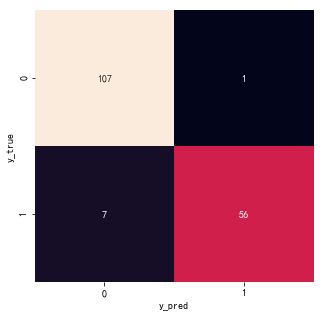

In [175]:
# 绘制混淆矩阵
# 预测结果
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# 绘制热度图
f, ax = plt.subplots(figsize =(5,5))
# 创建热度图，并显示数量（整数），隐藏色度指标
sns.heatmap(cm,annot = True,fmt = "d",cbar=False,ax=ax)
# 添加轴标签
plt.xlabel("y_pred")
plt.ylabel("y_true");

### 随机森林（Random Forest Classification）

In [176]:
# 使用前面相同的数据
# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier
# 实例化模型，并设置子树数量为100，随机参数
rf = RandomForestClassifier(n_estimators = 100,random_state = 2020)
# 拟合数据
rf.fit(x_train,y_train)
# 查看评分
print("模型准确率为: ",rf.score(x_test,y_test))

模型准确率为:  0.9473684210526315


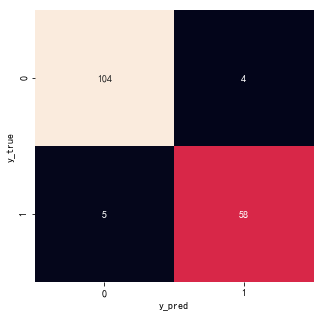

In [177]:
# 绘制混淆矩阵
# 预测结果
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

# 绘制热度图
f, ax = plt.subplots(figsize =(5,5))
# 创建热度图，并显示数量（整数），隐藏色度指标
sns.heatmap(cm,annot = True,fmt = "d",cbar=False,ax=ax)
# 添加轴标签
plt.xlabel("y_pred")
plt.ylabel("y_true");

## 分群问题（Clustering）
### K-Means

In [183]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("data/cluster_data.csv")
# 查看数据概览
data.head()

,x,y
0,25.292673,21.760312
1,28.496491,23.016235
2,27.857959,21.173973
3,31.165471,20.955495
4,26.062506,25.382237


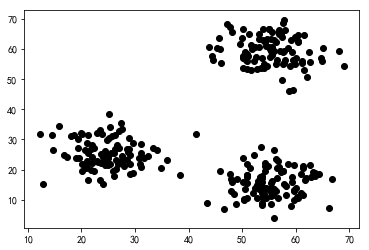

In [184]:
# 绘制数据
plt.scatter(data['x'],data['y'],color="black");

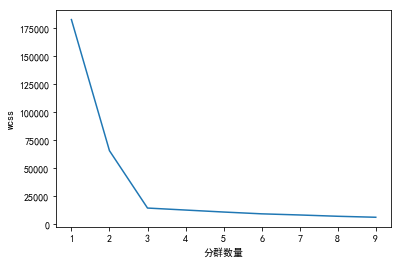

In [185]:
# 导入模型
from sklearn.cluster import KMeans
# 使用肘方法（Elbow Method）寻找最佳分群数量
# 定义空列表
wcss = []
# 使用for循环，测试从1-10个分群
for k in range(1,10):
    # 实例化模型
    kmeans = KMeans(n_clusters=k)
    # 拟合数据
    kmeans.fit(data)
    # 将模型评分添加到wcss列表中
    wcss.append(kmeans.inertia_)

# 绘制分群-评分关系图
plt.plot(range(1,10),wcss)
# 添加轴标签
plt.xlabel("分群数量")
plt.ylabel("wcss");

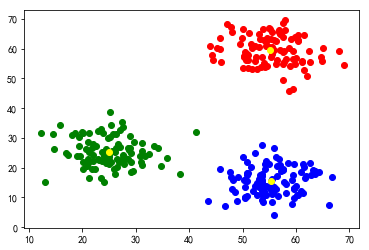

In [187]:
# 选择最佳分群数量建模
kmeans2 = KMeans(n_clusters=3)
# 对数据进行分群
data["label"] = kmeans2.fit_predict(data)

# 可视化分群结果
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
# 标记分群中心点
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow");

### 层次聚类（Hierarchical Clustering）

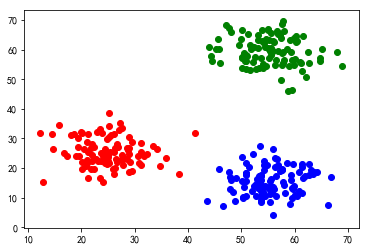

In [188]:
# 导入模型
from sklearn.cluster import AgglomerativeClustering

# 实例化模型
hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3)
# 数据分群
data["label"] = hiyerartical_cluster.fit_predict(data)

# 绘制结果
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue");

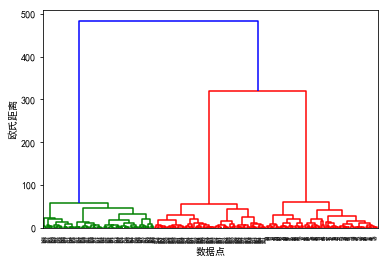

In [189]:
# 导入层次树状图可视化包
from scipy.cluster.hierarchy import linkage, dendrogram

# 计算树状图
merg = linkage(data,method="ward")
# 可视化
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("数据点")
plt.ylabel("欧氏距离");

## 数据降维问题（Dimensionality Reduction）
### 主成分分析（Principal Component Analysis (PCA)）

In [1]:
# 导入包
from sklearn.datasets import load_iris
import pandas as pd

# 加载数据
iris = load_iris()

# 创建DataFrame
feature_names = iris.feature_names
y = iris.target
data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

x = iris.data
# 查看数据概览
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sinif                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sinif  
0      0  
1      0  
2      0  
3      0  
4      0  


In [2]:
# 导入PCA模型
from sklearn.decomposition import PCA
# 实例化模型，并将结果映射到二维特征，且使用标准化
pca = PCA(n_components = 2, whiten= True )   
# 拟合数据
pca.fit(x)
# 处理数据
x_pca = pca.transform(x)

# 输出各个变量的方差百分比
print("variance ratio: ", pca.explained_variance_ratio_)
# 输出方差百分比之和
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


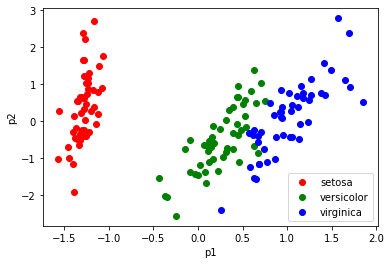

In [5]:
# 导入可视化包
import matplotlib.pyplot as plt
%matplotlib inline

# 可视化结果
# 新建两列，分别储存为降维后的两列
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]

# 定义可视化颜色
color = ["red","green","blue"]

# 在降维后的二维空间中，对三个类别进行可视化
for each in range(3):
    plt.scatter(data.p1[data.sinif == each],data.p2[data.sinif == each],color = color[each],label = iris.target_names[each])

# 显示图例
plt.legend()
# 设置轴标签
plt.xlabel("p1")
plt.ylabel("p2");

### LDA


## 模型优化

In [6]:
# 导入库
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# 加载数据
iris = load_iris()
x = iris.data
y = iris.target
# 转为DataFrame
data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y
# 查看数据概览
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sinif                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   sinif  
0      0  
1      0  
2      0  
3      0  
4      0  


In [66]:
# 归一化处理特征
x = (x-np.min(x))/(np.max(x)-np.min(x))

# 拆分为训练集与测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

# 导入KNN模型
from sklearn.neighbors import KNeighborsClassifier
# 实例化模型，设置近邻数为16
knn = KNeighborsClassifier(n_neighbors = 13) # n_neighbors = k

# 导入交叉验证评分
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = knn, X = x_train, y= y_train, cv = 10)
print("average accuracy: ",np.mean(accuracies))
print("average std: ",np.std(accuracies))

knn.fit(x_train,y_train)
print("test accuracy: ",knn.score(x_test,y_test))

average accuracy:  0.9805555555555555
average std:  0.03938179688543842
test accuracy:  0.9555555555555556


In [67]:
#Model Selection  grid search cross validation for knn
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV
knn_cv.fit(x,y)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

tuned hyperparameter K:  {'n_neighbors': 13}
tuned parametreye gore en iyi accuracy (best score):  0.98


In [68]:
#Model Selection Grid search CV with logistic regression
x = x[:100,:]
y = y[:100] 

from sklearn.linear_model import LogisticRegression
grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}  # l1 = lasso ve l2 = ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv = 10)
logreg_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ",logreg_cv.best_params_)
print("accuracy: ",logreg_cv.best_score_)

tuned hyperparameters: (best parameters):  {'C': 0.1, 'penalty': 'l2'}
accuracy:  1.0


## 特征工程

In [1]:
# 类别变量转为数值变量
get_dummies

NameError: name 'get_dummies' is not defined

In [ ]:
# 

## 数据不平衡问题

In [ ]:
imblearn

## 深度学习

In [ ]:
    
https://tensorflow.google.cn/tutorials?hl=zh-cn

### 让计算机懂“时尚”

In [1]:
# 导入包
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
# 设定图像参数
img_rows, img_cols = 28, 28
num_classes = 10



# 读入数据
fashion_file = "data/fashion-mnist_train.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')

# 拆分特征与标签
def prep_data(raw):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y
x, y = prep_data(fashion_data)

In [2]:
# Create a Sequential model called fashion_model. Don't add layers yet.
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

# Your Code Here
fashion_model = Sequential()


 2) Add the first layer

Add the first `Conv2D` layer to `fashion_model`. It should have 12 filters, a kernel_size of 3 and the `relu` activation function. The first layer always requires that you specify the `input_shape`.  We have saved the number of rows and columns to the variables `img_rows` and `img_cols` respectively, so the input shape in this case is `(img_rows, img_cols, 1)`.

In [3]:
# Your code here
fashion_model.add(Conv2D(12,
                         kernel_size=3,
                         activation='relu',                        
                         input_shape=(img_rows,img_cols,1)))


 3) Add the remaining layers

1. Add 2 more convolutional (`Conv2D layers`) with 20 filters each, 'relu' activation, and a kernel size of 3. Follow that with a `Flatten` layer, and then a `Dense` layer with 100 neurons. 
2. Add your prediction layer to `fashion_model`.  This is a `Dense` layer.  We alrady have a variable called `num_classes`.  Use this variable when specifying the number of nodes in this layer. The activation should be `softmax` (or you will have problems later).

In [4]:
# Your code here
fashion_model.add(Conv2D(20, activation='relu', kernel_size=3))
fashion_model.add(Conv2D(20, activation='relu', kernel_size=3))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation='relu'))
fashion_model.add(Dense(10, activation='softmax'))


 4) Compile Your Model
Compile fashion_model with the `compile` method.  Specify the following arguments:
1. `loss = "categorical_crossentropy"`
2. `optimizer = 'adam'`
3. `metrics = ['accuracy']`

In [5]:
# Your code to compile the model in this cell
fashion_model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])


 5) Fit The Model
Run the command `fashion_model.fit`. The arguments you will use are
1. The data used to fit the model. First comes the data holding the images, and second is the data with the class labels to be predicted. Look at the first code cell (which was supplied to you) where we called `prep_data` to find the variable names for these.
2. `batch_size = 100`
3. `epochs = 4`
4. `validation_split = 0.2`

When you run this command, you can watch your model start improving.  You will see validation accuracies after each epoch.

In [6]:
# Your code to fit the model here
fashion_model.fit(x, y, batch_size=100, epochs=4, validation_split=0.2)

Epoch 1/4
480/480 [==============================] - 28s 58ms/step - loss: 0.4804 - accuracy: 0.8290 - val_loss: 0.3432 - val_accuracy: 0.8812
Epoch 2/4
480/480 [==============================] - 26s 55ms/step - loss: 0.3085 - accuracy: 0.8893 - val_loss: 0.3068 - val_accuracy: 0.8922
Epoch 3/4
480/480 [==============================] - 26s 54ms/step - loss: 0.2514 - accuracy: 0.9088 - val_loss: 0.2789 - val_accuracy: 0.9011
Epoch 4/4
480/480 [==============================] - 26s 54ms/step - loss: 0.2092 - accuracy: 0.9229 - val_loss: 0.2725 - val_accuracy: 0.9051
